In [ ]:
import pandas as pd
data=pd.read_csv('C:\\Users\\Shreya choudhary\\ecsvfile.txt', sep=" ",names=["Catalina_Surveys_ID","ID","RA_(J2000)"," Dec ","V_(mag)","Period_(days)","Amplitude","Number_Obs","Var_Type"])
data1=pd.read_csv('C:\\Users\\Shreya choudhary\\Downloads\\ttt\\ALLVar', sep=",",header=None ,names=["ID","MJD","Mag","Magerr","RA","Dec"])
result = data[['ID','Var_Type']].merge(data1[['ID','MJD','Mag']], on = 'ID',how = 'left')
result1=result.round({'Mag': 6})
result1.to_csv('merged.txt', encoding='utf-8',index=False)


In [ ]:
import os
import time
from sklearn.utils import shuffle

import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools

from lasagne import random as lasagne_random
from lasagne import layers
from lasagne.nonlinearities import softmax, tanh
from lasagne import objectives
from lasagne import updates

import theano
import theano.tensor as T

import warnings
warnings.filterwarnings("ignore")

In [3]:
(result1.loc[result1['Var_Type'] == 13]).to_csv('vartype_13_data.txt',encoding='utf-8',index=False)


In [4]:
import pandas as pd
data2=pd.read_csv('C:\\Users\\Shreya choudhary\\vartype_13_data.txt')
data3 = data2.groupby('ID')
data3.apply(lambda x: x.to_csv('ID' + str(x.name) + '.txt',index=False,header=None))

""


/home/dic/jupyter/var4_txtfiles/ID1018062006271.txt
0.15558267259850925
0.07779133629925462
0.07779133629925462
1.2835570489377013
0.7779133629925463
0.15558267259850925
1.0890787081895648
0.42785234964590046
0.15558267259850925
0.07779133629925462
0.11668700444888194
0.07779133629925462
0.11668700444888194
0.07779133629925462
0.03889566814962731
0.03889566814962731
/home/dic/jupyter/var4_txtfiles/ID1160048034373.txt
0.08887339904929284
0.04443669952464642
0.9998257393045445
0.3332752464348482
0.04443669952464642
0.6887688426320195
0.15552844833626248
0.11109174881161606
0.02221834976232321
0.04443669952464642
0.02221834976232321
/home/dic/jupyter/var4_txtfiles/ID1015048047345.txt
0.3758598106384864
0.12528660354616214
1.085817230733405
0.918768426005189
0.2923354082743783
0.918768426005189
0.5011464141846486
0.08352440236410809
0.33409760945643235
0.12528660354616214
0.12528660354616214
0.041762201182054044
0.041762201182054044
/home/dic/jupyter/var4_txtfiles/ID1143060000775.txt
0.200

/home/dic/jupyter/var4_txtfiles/ID1129083028493.txt
0.0941257118875403
0.04706285594377015
0.003361632567412154
0.23531427971885077
0.0941257118875403
0.02016979540447292
0.20842121917955353
0.11429550729201322
0.030254693106709384
0.1243804049942497
0.043701223376358
0.013446530269648616
0.026893060539297232
0.02016979540447292
0.006723265134824308
0.006723265134824308
0.013446530269648616
0.003361632567412154
0.003361632567412154
0.003361632567412154
0.01008489770223646
0.006723265134824308
0.01680816283706077
0.006723265134824308
0.006723265134824308
0.030254693106709384
0.006723265134824308
0.006723265134824308
/home/dic/jupyter/var4_txtfiles/ID1123084032923.txt
0.049266402251283245
0.043470354927602865
0.014490118309200955
0.257924105903777
0.1275130411209684
0.02898023661840191
0.3129865554787406
0.15359525407753014
0.04057233126576267
0.049266402251283245
0.020286165632881336
0.002898023661840191
0.011592094647360765
0.005796047323680382
0.017388141971041146
0.005796047323680382

0.0698338113939137
0.05145649260604167
0.018377318787872025
0.38592369454531256
0.2315542167271875
0.09556205769693453
0.3124144193938244
0.09923752145450894
0.025728246303020834
0.05145649260604167
0.025728246303020834
0.00735092751514881
0.02940371006059524
0.01470185503029762
0.003675463757574405
0.011026391272723216
0.011026391272723216
0.003675463757574405
/home/dic/jupyter/var4_txtfiles/ID1149053039419.txt
0.26066004691929034
0.03723714955989862
0.05585572433984793
0.4282272199388341
0.26066004691929034
0.07447429911979724
0.3723714955989862
0.1861857477994931
0.01861857477994931
0.14894859823959447
0.11171144867969586
0.01861857477994931
0.1675671730195438
0.01861857477994931
0.07447429911979724
0.01861857477994931
0.05585572433984793
0.01861857477994931
0.09309287389974655
0.05585572433984793
0.1675671730195438
0.09309287389974655
0.03723714955989862
/home/dic/jupyter/var4_txtfiles/ID1018066056538.txt
0.3005746284080958
0.11271548565303592
0.07514365710202395
0.9392957137752994

0.10773973461876249
0.0758168502872773
0.03192288433148518
0.11971081624306942
0.0758168502872773
0.027932523790049534
0.14365297949168332
0.04788432649722777
0.027932523790049534
0.10374937407732683
0.05586504758009907
0.019951802707178237
0.12370117678450507
0.023942163248613885
0.019951802707178237
0.05586504758009907
0.051874687038663415
0.027932523790049534
0.043893965955792126
0.019951802707178237
0.003990360541435647
0.003990360541435647
0.011971081624306943
0.003990360541435647
0.04788432649722777
0.027932523790049534
0.007980721082871295
0.0917782924530199
0.067836129204406
0.023942163248613885
0.05985540812153471
0.05586504758009907
0.007980721082871295
/home/dic/jupyter/var4_txtfiles/ID1112111009815.txt
0.17407133521478543
0.08703566760739272
0.01450594460123212
0.17407133521478543
0.1450594460123212
0.04351783380369636
0.24660105822094605
0.05802377840492848
0.04351783380369636
0.2320951136197139
0.10154161220862484
0.04351783380369636
0.1450594460123212
0.05802377840492848

/home/dic/jupyter/var4_txtfiles/ID1001076004192.txt
0.1512788786126886
0.0475447904211307
0.017289014698592984
0.16424563963663333
0.05186704409577895
0.012966761023944737
0.10805634186620615
0.08644507349296492
0.05618929777042719
0.09941183451690964
0.06483380511972368
0.03457802939718597
0.07780056614366843
0.06915605879437194
0.012966761023944737
0.10805634186620615
0.025933522047889474
0.03025577572253772
0.03890028307183421
0.03025577572253772
0.004322253674648246
0.004322253674648246
0.004322253674648246
0.004322253674648246
0.004322253674648246
0.025933522047889474
0.025933522047889474
0.07780056614366843
0.05186704409577895
0.008644507349296492
0.06483380511972368
0.03025577572253772
0.008644507349296492
/home/dic/jupyter/var4_txtfiles/ID1146058003184.txt
0.143524511816021
0.1004671582712147
0.0143524511816021
0.574098047264084
0.24399167008723568
0.0287049023632042
0.4736308889928693
0.2152867677240315
0.1004671582712147
0.2296392189056336
0.1722294141792252
0.028704902363204

/home/dic/jupyter/var4_txtfiles/ID1107090064167.txt
0.05116942767188456
0.05685491963542729
0.011370983927085458
0.40366992941153373
0.18762123479691006
0.06254041159897002
0.3866134535209056
0.1933067267604528
0.011370983927085458
0.09096787141668367
0.022741967854170916
0.011370983927085458
0.005685491963542729
0.005685491963542729
0.011370983927085458
0.005685491963542729
/home/dic/jupyter/var4_txtfiles/ID1115021018417.txt
0.046129633322985156
0.04151666999068664
0.013838889996895547
0.10148519331056735
0.05535555998758219
0.023064816661492578
0.05535555998758219
0.046129633322985156
0.027677779993791094
0.1153240833074629
0.050742596655283675
0.00922592666459703
0.08303333998137329
0.046129633322985156
0.01845185332919406
0.08764630331367179
0.05535555998758219
0.027677779993791094
0.08303333998137329
0.050742596655283675
0.00922592666459703
0.00922592666459703
0.004612963332298515
0.013838889996895547
0.0599685233198807
0.01845185332919406
0.01845185332919406
0.1199370466397614
0.

0.12566763011303664
0.06792844870974953
0.02717137948389981
0.2003889236937611
0.1018926730646243
0.040757069225849714
0.1901996563872987
0.09170340575816185
0.030567801919387287
0.10528909550011177
0.040757069225849714
0.01698211217743738
0.02717137948389981
0.020378534612924857
0.006792844870974953
0.013585689741949906
0.006792844870974953
0.0033964224354874764
0.0033964224354874764
0.0033964224354874764
0.03736064679036224
0.030567801919387287
0.04415349166133719
0.03736064679036224
0.013585689741949906
/home/dic/jupyter/var4_txtfiles/ID1101048069561.txt
0.08717806793331458
0.037362029114277676
0.012454009704759225
0.10793475077457995
0.037362029114277676
0.00830267313650615
0.062270048523796126
0.0498160388190369
0.020756682841265375
0.12038876047933918
0.0664213850920492
0.029059355977771525
0.07057272166030228
0.07057272166030228
0.012454009704759225
0.11208608734283303
0.05811871195554305
0.020756682841265375
0.07472405822855535
0.04151336568253075
0.020756682841265375
0.0041513

0.004640835715260312
0.3759076929360853
0.2274009500477553
0.074253371444165
0.5104919286786344
0.23668262147827593
0.09281671430520624
0.013922507145780937
0.009281671430520624
0.009281671430520624
/home/dic/jupyter/var4_txtfiles/ID1001078053180.txt
0.10382291177813031
0.08196545666694499
0.016393091333389
0.10928727555592666
0.08196545666694499
0.027321818888981664
0.09835854800033399
0.07650109288914865
0.032786182666778
0.10928727555592666
0.04371491022237066
0.04371491022237066
0.07650109288914865
0.04371491022237066
0.016393091333389
0.10928727555592666
0.09289418422253766
0.016393091333389
0.08742982044474132
0.038250546444574325
0.010928727555592665
0.005464363777796332
0.005464363777796332
0.005464363777796332
0.005464363777796332
0.06010800155575966
0.016393091333389
0.027321818888981664
0.131144730667112
0.06010800155575966
0.027321818888981664
0.08196545666694499
0.04371491022237066
/home/dic/jupyter/var4_txtfiles/ID1112113084541.txt
0.0075113775288321106
0.0037556887644160

0.11378123410051671
0.06501784805743813
0.008127231007179766
0.17879908215795484
0.12190846510769647
0.19505354417231435
0.06501784805743813
0.024381693021539294
0.08127231007179765
0.05689061705025836
0.01625446201435953
0.08127231007179765
0.024381693021539294
0.008127231007179766
0.12190846510769647
0.06501784805743813
0.01625446201435953
0.08127231007179765
0.06501784805743813
0.040636155035898826
0.008127231007179766
0.008127231007179766
0.008127231007179766
0.04876338604307859
0.05689061705025836
0.03250892402871906
0.10565400309333695
0.05689061705025836
0.024381693021539294
0.15441738913641553
0.08939954107897742
0.008127231007179766
/home/dic/jupyter/var4_txtfiles/ID1132084018903.txt
0.48360877876403247
0.20726090518458534
0.10363045259229267
0.4145218103691707
0.24180438938201623
0.10363045259229267
0.7254131681460487
0.2763478735794471
0.06908696839486178
0.3454348419743089
0.17271742098715445
0.06908696839486178
0.20726090518458534
0.10363045259229267
0.10363045259229267
0.

0.08817587858994592
0.055690028583123746
0.013922507145780937
0.19955593575619343
0.06033086429838406
0.01856334286104125
0.16242925003411093
0.06033086429838406
0.013922507145780937
0.12530256431202844
0.051049192867863434
0.02320417857630156
0.06033086429838406
0.051049192867863434
0.013922507145780937
0.04640835715260312
0.04176752143734281
0.02320417857630156
0.02320417857630156
0.013922507145780937
0.004640835715260312
0.009281671430520624
0.051049192867863434
0.02320417857630156
0.004640835715260312
0.074253371444165
0.051049192867863434
0.009281671430520624
/home/dic/jupyter/var4_txtfiles/ID1001068012464.txt
0.0770242177781177
0.03624669071911421
0.02718501803933566
0.0951475631376748
0.06343170875844988
0.01359250901966783
0.0770242177781177
0.07249338143822842
0.018123345359557105
0.09967839947756409
0.04983919973878204
0.009061672679778553
0.11327090849723191
0.04530836339889276
0.02718501803933566
0.06343170875844988
0.06343170875844988
0.018123345359557105
0.072493381438228

2.2363516821669625
1.5095373854626997
0.44727033643339253
1.0622670490293071
0.2795439602708703
0.11181758410834813
0.05590879205417407
/home/dic/jupyter/var4_txtfiles/ID1129037026657.txt
0.12056299102435372
0.11128891479171113
0.037096304930570374
0.18548152465285186
0.10201483855906854
0.009274076232642594
0.16693337218756668
0.11128891479171113
0.018548152465285187
0.1576592959549241
0.10201483855906854
0.018548152465285187
0.055644457395855565
0.046370381163212966
0.018548152465285187
0.11128891479171113
0.07419260986114075
0.018548152465285187
0.11128891479171113
0.018548152465285187
0.009274076232642594
0.009274076232642594
0.018548152465285187
0.009274076232642594
0.009274076232642594
0.08346668609378334
0.037096304930570374
0.009274076232642594
0.1298370672569963
0.06491853362849816
0.037096304930570374
0.09274076232642593
0.037096304930570374
0.037096304930570374
/home/dic/jupyter/var4_txtfiles/ID1104117056089.txt
0.09925075412319388
0.04962537706159694
0.012406344265399235
0.

1.7343363597162744
1.1562242398108495
0.3678895308489067
1.208779887074979
0.5255564726412952
0.10511129452825906
0.10511129452825906
0.05255564726412953
/home/dic/jupyter/var4_txtfiles/ID1146062032722.txt
0.7388805721441447
0.4063843146792796
0.18472014303603618
0.6526778387273279
0.34481093366726756
0.06157338101201206
0.012314676202402413
0.012314676202402413
0.012314676202402413
0.012314676202402413
0.012314676202402413
0.012314676202402413
0.012314676202402413
/home/dic/jupyter/var4_txtfiles/ID1012089144993.txt
0.3754732864439909
0.16091712276171038
0.10727808184114027
1.3946150639348234
1.233697941173113
0.42911232736456106
1.0727808184114025
0.42911232736456106
0.10727808184114027
0.10727808184114027
0.10727808184114027
0.21455616368228053
0.05363904092057013
0.10727808184114027
0.05363904092057013
/home/dic/jupyter/var4_txtfiles/ID1109091099924.txt
0.13413992641869826
0.02438907753067241
0.02438907753067241
0.10975084888802585
0.07316723259201723
0.012194538765336205
0.10975084

/home/dic/jupyter/var4_txtfiles/ID1138079009568.txt
1.8220903497905903
0.6176577456917255
0.15441443642293137
0.7411892948300706
0.3705946474150353
0.09264866185375882
0.061765774569172545
0.030882887284586272
/home/dic/jupyter/var4_txtfiles/ID1163018017980.txt
0.9161427295796054
0.20821425672263758
0.04164285134452752
0.9161427295796054
0.22903568239490135
0.02082142567226376
0.02082142567226376
0.02082142567226376
/home/dic/jupyter/var4_txtfiles/ID1107018016065.txt
0.11138005716624749
0.055690028583123746
0.013922507145780937
0.09281671430520624
0.051049192867863434
0.009281671430520624
0.09745755002046655
0.06497170001364437
0.032485850006822185
0.08353504287468562
0.055690028583123746
0.027845014291561873
0.04176752143734281
0.032485850006822185
0.004640835715260312
0.08353504287468562
0.032485850006822185
0.02320417857630156
0.055690028583123746
0.02320417857630156
0.004640835715260312
0.009281671430520624
0.013922507145780937
0.009281671430520624
0.004640835715260312
0.0974575500

0.058979993129385906
0.11795998625877181
0.17693997938815773
1.5629698179287266
0.9731698866348675
0.20642997595285068
0.5308199381644731
0.11795998625877181
0.058979993129385906
0.08846998969407886
0.058979993129385906
0.058979993129385906
0.029489996564692953
0.058979993129385906
0.058979993129385906
0.058979993129385906
/home/dic/jupyter/var4_txtfiles/ID1152045036650.txt
0.0732688440506358
0.024422948016878603
0.9524949726582654
0.4151901162869362
0.1465376881012716
0.9036490766245082
0.39076716827005764
0.122114740084393
0.024422948016878603
0.0732688440506358
0.048845896033757205
0.024422948016878603
/home/dic/jupyter/var4_txtfiles/ID1157052042690.txt
0.1335378171119457
0.05723049304797673
0.17169147914393018
0.05723049304797673
0.01907683101599224
0.20984514117591466
0.05723049304797673
0.19076831015992243
0.07630732406396896
0.1335378171119457
0.01907683101599224
0.17169147914393018
0.03815366203198448
0.20984514117591466
0.09538415507996122
0.01907683101599224
0.019076831015992

/home/dic/jupyter/var4_txtfiles/ID1146069033173.txt
0.2247224018710548
0.14981493458070322
0.014981493458070321
0.5393337644905315
0.16479642803877353
0.014981493458070321
0.29962986916140644
0.14981493458070322
0.059925973832281286
0.25468538878719543
0.14981493458070322
0.029962986916140643
0.04494448037421096
0.029962986916140643
0.04494448037421096
0.029962986916140643
0.014981493458070321
0.07490746729035161
0.014981493458070321
/home/dic/jupyter/var4_txtfiles/ID1143053034119.txt
0.7774975535562364
0.4319430853090202
0.13438229320725073
0.5759241137453602
0.18237596935269743
0.06719114660362537
0.028796205687268015
0.009598735229089338
0.009598735229089338
/home/dic/jupyter/var4_txtfiles/ID1155038024710.txt
0.15833592076736405
0.19791990095920506
0.03958398019184101
1.1875194057552303
0.3958398019184101
0.15833592076736405
1.0687674651797072
0.47500776230209213
0.07916796038368203
0.19791990095920506
0.15833592076736405
0.03958398019184101
/home/dic/jupyter/var4_txtfiles/ID1109113

/home/dic/jupyter/var4_txtfiles/ID1009111066472.txt
0.11509297712362022
0.05754648856181011
0.21867665653487844
0.13811157254834427
0.05754648856181011
0.18414876339779238
0.09207438169889619
0.05754648856181011
0.1035836794112582
0.1035836794112582
0.03452789313708607
0.12660227483598224
0.09207438169889619
0.011509297712362023
0.1496208702607063
0.03452789313708607
0.08056508398653416
0.011509297712362023
0.011509297712362023
0.023018595424724047
0.011509297712362023
0.011509297712362023
0.011509297712362023
0.023018595424724047
0.11509297712362022
0.03452789313708607
0.011509297712362023
0.08056508398653416
0.05754648856181011
0.03452789313708607
0.21867665653487844
0.1035836794112582
0.023018595424724047
/home/dic/jupyter/var4_txtfiles/ID1132082005278.txt
0.006867946889727154
0.5288319105089908
0.27471787558908617
0.08241536267672585
0.5219639636192637
0.2403781411404504
0.06181152200754438
0.006867946889727154
0.006867946889727154
0.006867946889727154
/home/dic/jupyter/var4_txtfil

/home/dic/jupyter/var4_txtfiles/ID1009088003426.txt
0.3999302957218178
0.13331009857393927
0.06665504928696964
0.422148645484141
0.31105689667252495
0.08887339904929284
0.5776770938204034
0.13331009857393927
0.08887339904929284
0.17774679809858568
0.24440184738555532
0.04443669952464642
0.13331009857393927
0.04443669952464642
0.02221834976232321
0.04443669952464642
0.02221834976232321
0.02221834976232321
0.06665504928696964
0.04443669952464642
0.02221834976232321
0.08887339904929284
0.11109174881161606
0.02221834976232321
/home/dic/jupyter/var4_txtfiles/ID1163041037738.txt
0.08203313508449916
1.7226958367744825
0.5742319455914942
0.04101656754224958
0.6152485131337437
0.2050828377112479
0.04101656754224958
0.12304970262674875
/home/dic/jupyter/var4_txtfiles/ID1121089043236.txt
0.1854245779209116
0.0927122889604558
0.02060273088010129
0.3811505212818738
0.144219116160709
0.04120546176020258
0.3914518867219245
0.22663003968111417
0.04120546176020258
0.17512321248086096
0.0927122889604558

/home/dic/jupyter/var4_txtfiles/ID1160026025968.txt
0.2530808041130434
0.1265404020565217
0.2741708711224637
0.06327020102826085
0.33744107215072455
0.08436026803768114
0.2530808041130434
0.06327020102826085
0.1265404020565217
0.021090067009420285
0.147630469065942
0.06327020102826085
0.06327020102826085
0.021090067009420285
0.18981060308478256
0.06327020102826085
0.10545033504710143
/home/dic/jupyter/var4_txtfiles/ID1018112025080.txt
0.1450594460123212
0.05802377840492848
0.6237556178529812
0.34814267042957087
0.0725297230061606
0.37715455963203515
0.2175891690184818
0.04351783380369636
0.2756129474234103
0.1450594460123212
0.0725297230061606
0.05802377840492848
0.02901188920246424
0.02901188920246424
0.01450594460123212
0.01450594460123212
0.02901188920246424
0.01450594460123212
0.01450594460123212
/home/dic/jupyter/var4_txtfiles/ID1112022053507.txt
0.12818551386287222
0.04458626569143381
0.01671984963428768
0.10589238101715531
0.04458626569143381
0.005573283211429227
0.1114656642285

/home/dic/jupyter/var4_txtfiles/ID1015050001223.txt
0.1146754611222837
0.1911257685371395
0.0764503074148558
1.3761055334674044
0.6498276130262743
0.1529006148297116
0.764503074148558
0.4587018444891348
0.0764503074148558
0.1911257685371395
0.2293509222445674
0.1146754611222837
0.0382251537074279
0.0382251537074279
0.0382251537074279
0.0382251537074279
0.0382251537074279
/home/dic/jupyter/var4_txtfiles/ID1143001058200.txt
1.5558267259850926
0.8946003674414282
0.38895668149627316
1.0501830400399375
0.7001220266932917
0.11668700444888194
/home/dic/jupyter/var4_txtfiles/ID1018068047454.txt
0.025833248937122123
0.025833248937122123
1.0849964553591291
0.6458312234280531
0.20666599149697698
0.8524972149250301
0.5424982276795646
0.2583324893712212
0.10333299574848849
0.10333299574848849
0.051666497874244245
/home/dic/jupyter/var4_txtfiles/ID1107080008168.txt
0.08355690267741649
0.03133383850403118
0.02088922566935412
0.09922382192943208
0.07311228984273942
0.02611153208669265
0.14622457968547

/home/dic/jupyter/var4_txtfiles/ID1129105013828.txt
0.03186703328151341
0.06373406656302683
1.3702824311050767
0.7966758320378353
0.19120219968908048
0.924143965163889
0.3186703328151341
0.12746813312605365
0.03186703328151341
/home/dic/jupyter/var4_txtfiles/ID1126041003454.txt
0.09599014433563957
0.06762941987283697
0.010907970947231768
0.1745275351557083
0.09380855014619321
0.03054231865224895
0.1548931874506911
0.07853739082006873
0.019634347705017183
0.07199260825172968
0.04145028959948072
0.023997536083909893
0.03054231865224895
0.021815941894463536
0.004363188378892708
0.0283607244628026
0.010907970947231768
0.002181594189446354
0.006544782568339061
0.002181594189446354
0.004363188378892708
0.002181594189446354
0.010907970947231768
0.03054231865224895
0.010907970947231768
0.010907970947231768
/home/dic/jupyter/var4_txtfiles/ID1132078018498.txt
0.10242060730766624
0.07510844535895524
0.013656080974355498
0.23898141705122122
0.12631874901278836
0.03755422267947762
0.232153376564043

/home/dic/jupyter/var4_txtfiles/ID1107070045362.txt
0.08302470393614927
0.10378087992018659
0.031134263976055974
0.18161653986032653
0.0882137479321586
0.025945219980046647
0.13491514389624257
0.08302470393614927
0.025945219980046647
0.11934801190821458
0.06226852795211195
0.04151235196807464
0.0882137479321586
0.031134263976055974
0.01037808799201866
0.10896992391619591
0.05707948395610262
0.025945219980046647
0.025945219980046647
0.02075617598403732
0.01037808799201866
0.025945219980046647
0.015567131988027987
0.00518904399600933
0.08302470393614927
0.0363233079720653
0.015567131988027987
0.09859183592417725
0.04151235196807464
0.02075617598403732
/home/dic/jupyter/var4_txtfiles/ID1109123015530.txt
0.06561520881311626
0.03473746348929685
0.0424568998202517
0.3821120983822653
0.17754703561196167
0.04631661798572913
0.28947886241080706
0.15438872661909708
0.054036054316683985
0.07719436330954854
0.03473746348929685
0.0038597181654774276
0.0038597181654774276
0.007719436330954855
0.0038

0.12389165555411007
0.07964463571335646
0.030972913888527517
0.12831635753818543
0.06194582777705503
0.013274105952226079
0.1194669535700347
0.06637052976113039
0.017698807936301436
0.12831635753818543
0.026548211904452158
0.017698807936301436
0.08406933769743183
0.048671721824828956
0.022123509920376795
0.11061754960188398
0.08406933769743183
0.017698807936301436
0.03539761587260287
0.030972913888527517
0.013274105952226079
0.004424701984075359
0.004424701984075359
0.03982231785667823
0.030972913888527517
0.017698807936301436
0.08406933769743183
0.048671721824828956
0.013274105952226079
0.057521125792979674
0.022123509920376795
0.030972913888527517
/home/dic/jupyter/var4_txtfiles/ID1007091039960.txt
0.2771523952155519
0.23755919589904448
0.05938979897476112
0.41572859282332786
0.21776259624079078
0.05938979897476112
0.41572859282332786
0.11877959794952224
0.03959319931650741
0.2573557955572982
0.09898299829126853
0.03959319931650741
0.13857619760777595
0.11877959794952224
0.0197965996

/home/dic/jupyter/var4_txtfiles/ID1123087045818.txt
0.11643352294069716
0.08467892577505248
0.03175459716564468
0.14818812010634183
0.0529243286094078
0.02116973144376312
0.12701838866257872
0.04233946288752624
0.03175459716564468
0.14818812010634183
0.0529243286094078
0.01058486572188156
0.0529243286094078
0.0529243286094078
0.14818812010634183
0.09526379149693404
0.02116973144376312
0.15877298582822338
0.06350919433128936
0.02116973144376312
0.01058486572188156
0.02116973144376312
0.01058486572188156
0.01058486572188156
0.09526379149693404
0.04233946288752624
0.03175459716564468
0.16935785155010497
0.03175459716564468
0.02116973144376312
0.08467892577505248
0.08467892577505248
/home/dic/jupyter/var4_txtfiles/ID1152046014027.txt
0.11419614893460847
0.057098074467304236
0.11419614893460847
1.7700403084864313
0.9135691914768678
0.34258844680382544
0.9135691914768678
0.34258844680382544
0.17129422340191272
0.057098074467304236
/home/dic/jupyter/var4_txtfiles/ID1104071058613.txt
0.1434570

/home/dic/jupyter/var4_txtfiles/ID1004045083456.txt
0.035709284463953626
0.07141856892790725
1.4640806630220986
0.7856042582069798
0.3213835601755826
0.7498949737430262
0.3928021291034899
0.07141856892790725
0.1785464223197681
0.035709284463953626
0.10712785339186087
0.10712785339186087
0.035709284463953626
0.07141856892790725
0.07141856892790725
0.07141856892790725
0.07141856892790725
0.07141856892790725
0.07141856892790725
0.07141856892790725
/home/dic/jupyter/var4_txtfiles/ID1132056020236.txt
0.08880479199684362
0.06512351413101865
0.035521916798737445
0.12432670879558107
0.08880479199684362
0.023681277865824964
0.1598486255943185
0.04736255573164993
0.023681277865824964
0.11840638932912483
0.06512351413101865
0.017760958399368722
0.05920319466456241
0.05920319466456241
0.011840638932912482
0.13616734772849354
0.05328287519810617
0.011840638932912482
0.04144223626519369
0.029601597332281206
0.005920319466456241
0.07104383359747489
0.1006454309297561
0.07696415306393113
0.01184063893

/home/dic/jupyter/var4_txtfiles/ID1015003043902.txt
0.15138431655857537
0.110097684769873
0.06881105298117063
0.6055372662343015
0.3991041072907896
0.09633547417363887
0.6055372662343015
0.24771979073221426
0.09633547417363887
0.15138431655857537
0.06881105298117063
0.013762210596234125
0.013762210596234125
0.02752442119246825
0.013762210596234125
0.02752442119246825
0.04128663178870238
0.013762210596234125
/home/dic/jupyter/var4_txtfiles/ID1118073008935.txt
0.18785914275505988
0.07514365710202395
0.07514365710202395
1.315013999285419
0.9392957137752994
0.22543097130607184
1.1647266850813713
0.3005746284080958
0.18785914275505988
0.037571828551011974
0.18785914275505988
0.07514365710202395
0.037571828551011974
0.037571828551011974
0.037571828551011974
0.037571828551011974
0.037571828551011974
0.037571828551011974
0.037571828551011974
/home/dic/jupyter/var4_txtfiles/ID1112073017905.txt
0.047305444770204916
0.033789603407289225
0.010136881022186768
0.34803291509507905
0.18922177908081966

/home/dic/jupyter/var4_txtfiles/ID1163023025538.txt
0.2260193029604287
0.10045302353796831
0.025113255884492078
0.7031711647657781
0.07533976765347623
0.025113255884492078
0.35158558238288906
0.07533976765347623
0.025113255884492078
0.20090604707593662
0.050226511768984156
0.10045302353796831
0.050226511768984156
0.10045302353796831
0.025113255884492078
0.025113255884492078
0.025113255884492078
0.025113255884492078
0.050226511768984156
0.025113255884492078
0.050226511768984156
0.050226511768984156
0.050226511768984156
0.10045302353796831
0.025113255884492078
0.025113255884492078
/home/dic/jupyter/var4_txtfiles/ID1140073035033.txt
0.04677116695779607
0.017988910368383102
0.3309959507782491
0.1403135008733882
0.04677116695779607
0.284224783820453
0.19068244990486088
0.035977820736766204
0.09714011598926875
0.043173384884119446
0.028782256589412965
0.010793346221029862
0.007195564147353241
0.0035977820736766207
0.0035977820736766207
0.0035977820736766207
0.010793346221029862
0.00719556414

/home/dic/jupyter/var4_txtfiles/ID1112002022226.txt
0.0646260419195275
0.04308402794635167
0.014361342648783889
0.42365960813912473
0.2872268529756778
0.057445370595135554
0.43802095078790865
0.19387812575858251
0.04308402794635167
0.05026469927074361
0.021542013973175834
0.014361342648783889
0.035903356621959724
0.007180671324391944
0.007180671324391944
0.007180671324391944
0.007180671324391944
0.007180671324391944
0.007180671324391944
0.007180671324391944
0.007180671324391944
0.007180671324391944
0.014361342648783889
0.014361342648783889
0.007180671324391944
/home/dic/jupyter/var4_txtfiles/ID1132083030077.txt
1.400399404394407
0.3819271102893837
0.1273090367631279
1.1457813308681513
0.3819271102893837
0.06365451838156395
0.1273090367631279
0.06365451838156395
0.06365451838156395
0.06365451838156395
0.06365451838156395
/home/dic/jupyter/var4_txtfiles/ID1118026047850.txt
0.006867946889727154
0.013735893779454307
0.006867946889727154
0.6524549545240796
0.4326806540528107
0.1442268846842

/home/dic/jupyter/var4_txtfiles/ID1012012031251.txt
0.010681970513858064
0.010681970513858064
0.8759215821363613
0.6622821718592
0.21363941027716127
0.5340985256929032
0.18159349873558708
0.04272788205543226
0.010681970513858064
0.04272788205543226
0.02136394102771613
/home/dic/jupyter/var4_txtfiles/ID1118091108367.txt
0.0899153739243924
1.2138575479792975
0.8541960522817278
0.224788434810981
1.3936882958280823
0.3147038087353734
0.0449576869621962
0.0899153739243924
0.1798307478487848
0.0449576869621962
/home/dic/jupyter/var4_txtfiles/ID1143074058992.txt
2.1925006023226667
1.2789586846882222
0.3654167670537778
0.3654167670537778
0.4872223560717037
0.12180558901792593
0.060902794508962965
0.060902794508962965
0.060902794508962965
/home/dic/jupyter/var4_txtfiles/ID1004110026078.txt
0.08657273814850852
0.06492955361138139
0.6925819051880682
0.3030045835197798
0.08657273814850852
0.9306569350964665
0.4328636907425426
0.10821592268563565
0.10821592268563565
0.08657273814850852
0.0649295536

/home/dic/jupyter/var4_txtfiles/ID1101091030099.txt
0.03384117210793109
0.020304703264758656
0.006768234421586219
0.6226775667859321
0.3248752522361385
0.12182821958855193
0.3654846587656558
0.12859645401013814
0.020304703264758656
0.06768234421586218
0.04060940652951731
0.013536468843172438
0.013536468843172438
0.006768234421586219
0.006768234421586219
0.013536468843172438
0.006768234421586219
/home/dic/jupyter/var4_txtfiles/ID1012054048920.txt
0.39312596390054044
0.16187539690022254
0.11562528350015895
0.5781264175007947
0.3237507938004451
0.4856261907006676
0.3237507938004451
0.18500045360025433
0.37000090720050866
0.16187539690022254
0.04625011340006358
0.06937517010009538
0.02312505670003179
0.02312505670003179
0.06937517010009538
0.02312505670003179
0.04625011340006358
0.02312505670003179
0.09250022680012716
0.06937517010009538
0.02312505670003179
/home/dic/jupyter/var4_txtfiles/ID1109093005933.txt
0.31369172138478496
0.0941075164154355
0.062738344276957
0.564645098492613
0.34506

/home/dic/jupyter/var4_txtfiles/ID1101082060672.txt
0.2560853140720603
0.08536177135735344
0.02438907753067241
0.2316962365413879
0.20730715901071547
0.060972693826681024
0.2438907753067241
0.07316723259201723
0.02438907753067241
0.14633446518403445
0.04877815506134482
0.012194538765336205
0.07316723259201723
0.03658361629600861
0.012194538765336205
0.13413992641869826
0.060972693826681024
0.02438907753067241
0.03658361629600861
0.02438907753067241
0.02438907753067241
0.08536177135735344
0.12194538765336205
0.012194538765336205
0.15852900394937067
0.060972693826681024
/home/dic/jupyter/var4_txtfiles/ID1107065053250.txt
0.12086453695157469
0.05438904162820861
0.012086453695157469
0.10273485640883849
0.05438904162820861
0.012086453695157469
0.07856194901852355
0.030216134237893672
0.030216134237893672
0.15108067118946836
0.07856194901852355
0.03625936108547241
0.05438904162820861
0.018129680542736205
0.11482131010399596
0.05438904162820861
0.024172907390314937
0.10877808325641722
0.05438

/home/dic/jupyter/var4_txtfiles/ID1132054033210.txt
0.12606195988832247
0.09337922954690553
0.023344807386726382
0.219441189435228
0.12606195988832247
0.023344807386726382
0.2007653435258469
0.08871026806956026
0.046689614773452764
0.13539988284301302
0.07470338363752442
0.018675845909381105
0.09337922954690553
0.02801376886407166
0.032682730341416937
0.018675845909381105
0.009337922954690553
0.009337922954690553
0.03735169181876221
0.018675845909381105
0.023344807386726382
0.0606964992054886
0.032682730341416937
0.004668961477345276
/home/dic/jupyter/var4_txtfiles/ID1126088113171.txt
0.5039525700753729
0.3206970900479646
0.09162774001370416
1.2827883601918584
0.5955803100890771
0.13744161002055624
0.7788357901164854
0.2748832200411125
0.04581387000685208
0.2748832200411125
0.04581387000685208
0.04581387000685208
0.04581387000685208
0.04581387000685208
0.04581387000685208
0.09162774001370416
0.13744161002055624
0.04581387000685208
/home/dic/jupyter/var4_txtfiles/ID1132084119146.txt
0.0

/home/dic/jupyter/var4_txtfiles/ID1001081003440.txt
0.13630694312306643
0.13630694312306643
0.015145215902562936
0.15145215902562936
0.09087129541537761
0.045435647707688806
0.18174259083075522
0.045435647707688806
0.045435647707688806
0.060580863610251744
0.07572607951281468
0.045435647707688806
0.07572607951281468
0.10601651131794056
0.1665973749281923
0.09087129541537761
0.030290431805125872
0.12116172722050349
0.07572607951281468
0.030290431805125872
0.015145215902562936
0.015145215902562936
0.07572607951281468
0.09087129541537761
0.060580863610251744
0.2120330226358811
0.10601651131794056
0.015145215902562936
0.060580863610251744
0.015145215902562936
0.015145215902562936
/home/dic/jupyter/var4_txtfiles/ID1001111076532.txt
0.133735413837335
0.2006031207560025
0.03343385345933375
1.0030156037800126
0.5015078018900063
0.26747082767467
0.8358463364833438
0.36777238805267126
0.0668677069186675
0.26747082767467
0.10030156037800125
0.03343385345933375
0.16716926729666876
0.10030156037800

/home/dic/jupyter/var4_txtfiles/ID1101028029698.txt
0.0996320776380738
0.0830267313650615
0.0498160388190369
0.3404095985967521
0.18681014557138836
0.029059355977771525
0.26153420379994374
0.10793475077457995
0.037362029114277676
0.11208608734283303
0.037362029114277676
0.00830267313650615
0.0332106925460246
0.012454009704759225
0.004151336568253075
0.0166053462730123
0.02490801940951845
0.012454009704759225
0.00830267313650615
0.00830267313650615
0.004151336568253075
0.004151336568253075
0.012454009704759225
/home/dic/jupyter/var4_txtfiles/ID1146070107451.txt
1.642397092249782
0.8569028307390166
0.21422570768475416
1.2139456768802737
0.4998599845977597
0.07140856922825138
0.2856342769130055
0.07140856922825138
/home/dic/jupyter/var4_txtfiles/ID1018076003166.txt
0.2638385930558263
0.22614736547642256
0.07538245515880752
0.4334491171631432
0.24499297926612443
0.07538245515880752
0.3769122757940376
0.13191929652791315
0.01884561378970188
0.24499297926612443
0.11307368273821128
0.01884561

/home/dic/jupyter/var4_txtfiles/ID1012086052632.txt
0.06777794656279539
0.09682563794685056
0.05809538276811033
0.687462029422639
0.348572296608662
0.14523845692027584
0.21301640348307124
0.05809538276811033
0.009682563794685056
0.04841281897342528
0.029047691384055167
0.06777794656279539
0.01936512758937011
0.009682563794685056
0.07746051035748044
0.05809538276811033
0.009682563794685056
0.009682563794685056
0.009682563794685056
0.009682563794685056
0.07746051035748044
0.04841281897342528
0.009682563794685056
0.009682563794685056
/home/dic/jupyter/var4_txtfiles/ID1112113035492.txt
0.1155065680454491
0.06600375316882806
0.03300187658441403
0.1155065680454491
0.07150406593289707
0.03850218934848303
0.15950907015800114
0.08250469146103508
0.005500312764069005
0.1100062552813801
0.04400250211255204
0.01100062552813801
0.08800500422510409
0.06050344040475906
0.03850218934848303
0.09900562975324209
0.03300187658441403
0.03850218934848303
0.027501563820345024
0.01100062552813801
0.0440025021

/home/dic/jupyter/var4_txtfiles/ID1001111103810.txt
1.2166767655382285
0.5986822179632553
0.21243562572889702
0.5793698883515374
0.32830960339920445
0.07724931844687165
0.019312329611717912
0.019312329611717912
0.019312329611717912
0.019312329611717912
/home/dic/jupyter/var4_txtfiles/ID1129085095359.txt
1.4106284587019393
0.6243765309008583
0.18500045360025433
0.7862519278010809
0.39312596390054044
0.13875034020019075
0.02312505670003179
/home/dic/jupyter/var4_txtfiles/ID1121070019809.txt
0.10966843476410913
0.04700075775604677
0.02088922566935412
0.3498945299616815
0.2088922566935412
0.07311228984273942
0.3655614492136971
0.20366995027620266
0.06266767700806236
0.1566691925201559
0.07311228984273942
0.01566691925201559
0.02088922566935412
0.00522230641733853
0.00522230641733853
0.00522230641733853
0.02088922566935412
0.01044461283467706
/home/dic/jupyter/var4_txtfiles/ID1112042012743.txt
0.14398193172432697
0.047993977241442325
0.12798393931051286
0.09598795448288465
0.007998996206907

/home/dic/jupyter/var4_txtfiles/ID1143064001209.txt
0.18609257734163112
0.15950792343568382
0.13292326952973652
0.5316930781189461
0.23926188515352573
0.026584653905947303
0.23926188515352573
0.13292326952973652
0.3987698085892096
0.13292326952973652
0.026584653905947303
0.18609257734163112
0.07975396171784191
0.07975396171784191
0.10633861562378921
0.053169307811894606
0.053169307811894606
0.026584653905947303
0.10633861562378921
0.07975396171784191
0.026584653905947303
0.18609257734163112
0.13292326952973652
0.026584653905947303
/home/dic/jupyter/var4_txtfiles/ID1012107034518.txt
0.5846708165487566
0.20881100591027021
0.12528660354616214
1.0022928283692971
0.8352440236410809
0.16704880472821618
0.918768426005189
0.2505732070923243
0.16704880472821618
0.20881100591027021
0.16704880472821618
0.041762201182054044
0.08352440236410809
0.041762201182054044
0.041762201182054044
0.08352440236410809
0.08352440236410809
/home/dic/jupyter/var4_txtfiles/ID1012086022027.txt
0.02362131786068712
0.

/home/dic/jupyter/var4_txtfiles/ID1163040039197.txt
2.2363516821669625
0.7268142967042628
0.11181758410834813
0.8945406728667851
0.22363516821669627
/home/dic/jupyter/var4_txtfiles/ID1118016034093.txt
0.10314860969285707
0.05656536660576032
0.019964247037327174
0.16969609981728098
0.12644023123640544
0.03660111956843315
0.20629721938571413
0.11645810771774184
0.049910617593317934
0.10647598419907825
0.0665474901244239
0.016636872531105976
0.05656536660576032
0.013309498024884781
0.0033273745062211953
0.023291621543548368
0.006654749012442391
0.0033273745062211953
0.0033273745062211953
0.009982123518663587
0.0033273745062211953
0.013309498024884781
0.019964247037327174
0.0033273745062211953
0.0665474901244239
0.016636872531105976
0.006654749012442391
/home/dic/jupyter/var4_txtfiles/ID1135103094730.txt
0.24440184738555532
0.08887339904929284
0.02221834976232321
0.31105689667252495
0.13331009857393927
0.422148645484141
0.26662019714787855
0.06665504928696964
0.26662019714787855
0.04443669

/home/dic/jupyter/var4_txtfiles/ID1012049000637.txt
0.582413400423322
0.1456033501058305
0.291206700211661
0.873620100634983
0.4853445003527683
0.09706890007055367
0.6794823004938757
0.4853445003527683
0.09706890007055367
0.291206700211661
0.291206700211661
0.19413780014110735
0.1456033501058305
0.04853445003527684
0.04853445003527684
0.09706890007055367
0.1456033501058305
/home/dic/jupyter/var4_txtfiles/ID1143006096478.txt
0.31827259190781976
0.2546180735262558
0.06365451838156395
1.1457813308681513
0.4455816286709477
0.1273090367631279
1.0184722941050233
0.9548177757234593
0.2546180735262558
0.4455816286709477
0.19096355514469185
0.06365451838156395
0.06365451838156395
0.06365451838156395
0.06365451838156395
0.06365451838156395
0.06365451838156395
/home/dic/jupyter/var4_txtfiles/ID1121076035939.txt
0.01351184273513465
0.004503947578378216
0.49993818119998207
0.270236854702693
0.09908684672432076
0.42337107236755234
0.2657329071243148
0.06755921367567325
0.004503947578378216
0.0045039

KeyboardInterrupt: 

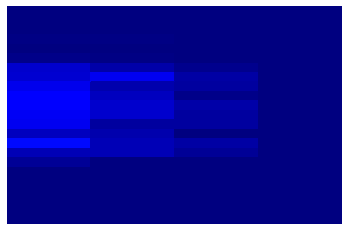

In [7]:
import pandas as pd
import glob
import numpy as np

#l = [pd.read_csv(filename) for filename in glob.glob("C:\\Users\\Shreya choudhary\\variable type\\*.txt")]

file_list = glob.glob("/home/dic/jupyter/var4_txtfiles" + "/*.txt") #Get folder path containing text files

#print(file_list)
d=1
for file_path in file_list:
    print(file_path)
    ID,Var_Type,MJD,Mag=np.loadtxt(file_path, unpack=True, delimiter=',')
    c=[]
    e=[]
    for i in range(0,len(Mag)):
        for j in range(i+1,len(Mag)):
            c.append(Mag[i]-Mag[j])
    #print(c)   
    for i in range(0,len(MJD)):
        for j in range(i+1,len(MJD)):
            e.append(MJD[j]-MJD[i])
    #print(e)
    s1 = pd.Series(c, name='dm_y')

    s2 = pd.Series(e,name='dt_x')



#Assigning bins to all dmdt values

    bins=[-8,-5,-3,-2.5,-2,-1.5,-1,-0.5,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.5,1,1.5,2,2.5,3,5,8]
    #bins1=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,2510,2520,2530,2540,2550,2560,2570,2580,2590,2600,2610,2620,2630,2640,2650,2660,2670,2680,2690,2700,2710,2720,2730,2740,2750,2760,2770,2780,2790,2800,2810,2820,2830,2840,2850,2860,2870] #bins of x axis
    #bins1=[1 / 144,2 / 144,3 / 144,4 / 144,5 / 144,6 / 144,7 / 144,8 / 144,9 / 144,10 / 144,11 / 144,12 / 144,13 / 144,14 / 144,15 / 144,16 / 144,17 / 144,18 / 144,19 / 144,20 / 144,21 / 144,22 / 144,23 / 144,24 / 144,25 / 144,26 / 144,27 / 144,28 / 144,29 / 144,30 / 144,31 / 144,32 / 144,33 / 144,34 / 144,35 / 144,36 / 144,37 / 144,38 / 144,39 / 144,40 / 144,41 / 144,42 / 144,43 / 144,44 / 144,45 / 144,46 / 144,47 / 144,48 / 144,49 / 144,50 / 144,51 / 144,52 / 144,53 / 144,54 / 144,55 / 144,56 / 144,57 / 144,58 / 144,59 / 144,60 / 144,61 / 144,62 / 144,63 / 144,64 / 144,65 / 144,66 / 144,67 / 144,68 / 144,69 / 144,70 / 144,71 / 144,72 / 144,73 / 144,74 / 144,75 / 144,76 / 144,77 / 144,78 / 144,79 / 144,80 / 144,81 / 144,82 / 144,83 / 144,84 / 144,85 / 144,86 / 144,87 / 144,88 / 144,89 / 144,90 / 144,91 / 144,92 / 144,93 / 144,94 / 144,95 / 144,96 / 144,97 / 144,98 / 144,99 / 144,100 / 144,101 / 144,102 / 144,103 / 144,104 / 144,105 / 144,106 / 144,107 / 144,108 / 144,109 / 144,110 / 144,111 / 144,112 / 144,113 / 144,114 / 144,115 / 144,116 / 144,117 / 144,118 / 144,119 / 144,120 / 144,121 / 144,122 / 144,123 / 144,124 / 144,125 / 144,126 / 144,127 / 144,128 / 144,129 / 144,130 / 144,131 / 144,132 / 144,133 / 144,134 / 144,135 / 144,136 / 144,137 / 144,138 / 144,139 / 144,140 / 144,141 / 144,142 / 144,143 / 144,144 / 144,145 / 144,146 / 144,147 / 144,148 / 144,149 / 144,150 / 144,151 / 144,152 / 144,153 / 144,154 / 144,155 / 144,156 / 144,157 / 144,158 / 144,159 / 144,160 / 144,161 / 144,162 / 144,163 / 144,164 / 144,165 / 144,166 / 144,167 / 144,168 / 144,169 / 144,170 / 144,171 / 144,172 / 144,173 / 144,174 / 144,175 / 144,176 / 144,177 / 144,178 / 144,179 / 144,180 / 144,181 / 144,182 / 144,183 / 144,184 / 144,185 / 144,186 / 144,187 / 144,188 / 144,189 / 144,190 / 144,191 / 144,192 / 144,193 / 144,194 / 144,195 / 144,196 / 144,197 / 144,198 / 144,199 / 144,200 / 144,201 / 144,202 / 144,203 / 144,204 / 144,205 / 144,206 / 144,207 / 144,208 / 144,209 / 144,210 / 144,211 / 144,212 / 144,213 / 144,214 / 144,215 / 144,216 / 144,217 / 144,218 / 144,219 / 144,220 / 144,221 / 144,222 / 144,223 / 144,224 / 144,225 / 144,226 / 144,227 / 144,228 / 144,229 / 144,230 / 144,231 / 144,232 / 144,233 / 144,234 / 144,235 / 144,236 / 144,237 / 144,238 / 144,239 / 144,240 / 144,241 / 144,242 / 144,243 / 144,244 / 144,245 / 144,246 / 144,247 / 144,248 / 144,249 / 144,250 / 144,251 / 144,252 / 144,253 / 144,254 / 144,255 / 144,256 / 144,257 / 144,258 / 144,259 / 144,260 / 144,261 / 144,262 / 144,263 / 144,264 / 144,265 / 144,266 / 144,267 / 144,268 / 144,269 / 144,270 / 144,271 / 144,272 / 144,273 / 144,274 / 144,275 / 144,276 / 144,277 / 144,278 / 144,279 / 144,280 / 144,281 / 144,282 / 144,283 / 144,284 / 144,285 / 144,286 / 144,287 / 144,288 / 144,289 / 144,290 / 144,291 / 144,292 / 144,293 / 144,294 / 144,295 / 144,296 / 144,297 / 144,298 / 144,299 / 144,300 / 144,301 / 144,302 / 144,303 / 144,304 / 144,305 / 144,306 / 144,307 / 144,308 / 144,309 / 144,310 / 144,311 / 144,312 / 144,313 / 144,314 / 144,315 / 144,316 / 144,317 / 144,318 / 144,319 / 144,320 / 144,321 / 144,322 / 144,323 / 144,324 / 144,325 / 144,326 / 144,327 / 144,328 / 144,329 / 144,330 / 144,331 / 144,332 / 144,333 / 144,334 / 144,335 / 144,336 / 144,337 / 144,338 / 144,339 / 144,340 / 144,341 / 144,342 / 144,343 / 144,344 / 144,345 / 144,346 / 144,347 / 144,348 / 144,349 / 144,350 / 144,351 / 144,352 / 144,353 / 144,354 / 144,355 / 144,356 / 144,357 / 144,358 / 144,359 / 144,360 / 144,361 / 144,362 / 144,363 / 144,364 / 144,365 / 144,366 / 144,367 / 144,368 / 144,369 / 144,370 / 144,371 / 144,372 / 144,373 / 144,374 / 144,375 / 144,376 / 144,377 / 144,378 / 144,379 / 144,380 / 144,381 / 144,382 / 144,383 / 144,384 / 144,385 / 144,386 / 144,387 / 144,388 / 144,389 / 144,390 / 144,391 / 144,392 / 144,393 / 144,394 / 144,395 / 144,396 / 144,397 / 144,398 / 144,399 / 144,400 / 144,401 / 144,402 / 144,403 / 144,404 / 144,405 / 144,406 / 144,407 / 144,408 / 144,409 / 144,410 / 144,411 / 144,412 / 144,413 / 144,414 / 144,415 / 144,416 / 144,417 / 144,418 / 144,419 / 144,420 / 144,421 / 144,422 / 144,423 / 144,424 / 144,425 / 144,426 / 144,427 / 144,428 / 144,429 / 144,430 / 144,431 / 144,432 / 144]
    bins1=[1 / 144,2 / 144,3 / 144,4 / 144]
    return_bins_of_s2= np.digitize(s2, bins1) # np.digitize gives the bin number to which a particular value of dm, dt belongs to.
    return_bins_of_s1 = np.digitize(s1, bins)
    ybins = pd.Series(return_bins_of_s1, name='ybin')
    xbins = pd.Series(return_bins_of_s2, name='xbin')

    dmdt=pd.concat([s1, s2,ybins,xbins], axis=1)
    #print(dmdt)


# exclude all the values from dataframe dmdt that are outside the bin boundries i.e. bin number 0, 23 and 24
    #dmdt=dmdt[dmdt.ybin != 23]
    #dmdt=dmdt[dmdt.xbin != 0]
    #dmdt=dmdt[dmdt.ybin != 0]
    #dmdt=dmdt[dmdt.xbin != 432]


    dmdt['bins_xaxis']=pd.cut(dmdt['dt_x'],bins1) #pd.cut gives range of bin for all dt_x values 
    dmdt['bins_yaxis']=pd.cut(dmdt['dm_y'],bins)


    dmdt['merged_dmdt']=  dmdt.dm_y.map(str) + ',' + dmdt.dt_x.map(str)
    dmdt['dmdt_bin_number']=  dmdt.ybin.map(str) + ',' + dmdt.xbin.map(str)

    dmdt.dropna() # drops all the values with NaN in dataframe dmdt
    #print(dmdt)
 


    dmdtpairs=len(dmdt.dm_y) # number of dmdtpairs for a light curve of length n that falls under the given bin range
    #print(dmdtpairs)


#grouping and counting all the values that fall in all individual bins
    df=dmdt.groupby('dmdt_bin_number',sort=False).merged_dmdt.agg(['count']) #counts how many merged_dmdt benlongs to each 'dmdt_bin_number' range
    #print(df)
    df.to_csv('/home/dic/jupyter/count15666.txt',encoding='utf-8')

    data_count=pd.read_csv('/home/dic/jupyter/count15666.txt')

    ldf=dmdt.set_index('dmdt_bin_number').join(data_count.set_index('dmdt_bin_number'))

    abcc=ldf.dropna()
    final=abcc.drop_duplicates(['ybin','xbin']) # drops all the rows where both of values of ybin and xbin are duplicate
    final1=final.drop(['bins_xaxis','bins_yaxis','merged_dmdt'],axis=1)
    #print(final1)
    final1.to_csv('/home/dic/jupyter/final_table115666.txt',encoding='utf-8',header=None,index=False)

    
    dm,dt,xbin,ybin,count=np.loadtxt('/home/dic/jupyter/final_table115666.txt',unpack=True,delimiter=',',dtype="i")

# assignig intensity values to each bin. Bins are in the form of 23x24 numpy array

    aa = np.zeros(shape=(23,4))
    for gg in range(0,len(xbin)):
                    
        l1=xbin[gg]
        m1=ybin[gg]
        o1=count[gg]
        i1=(255 * o1)/(dmdtpairs + 0.99999)
        print(i1)
        aa[l1-1,m1-1]=i1
            
    #print (aa)  
    import os
    import seaborn as sns
    #files = os.listdir(path_list)
    sns.set()
    image11=sns.heatmap(aa,cmap='jet',vmin=0, vmax=1,cbar=False,xticklabels=False, yticklabels=False)
    #
#image11=sns.heatmap(aa,xticklabels=False, yticklabels=False)
#vmin=0, vmax=255,
#cmap='RdYlBu'// colormap of heatmap
#sns_plot.figure.savefig("output.png")
    #, bbox_inches = 'tight',pad_inches = 0
    image11.figure.savefig("/home/dic/jupyter/image_var13"+"/RRab.fig%d.png" %d, bbox_inches = 'tight',pad_inches = 0)
    d=d+1
#os.rename(os.path.join(file_list, file), os.path.join(file_list, str(d)+'.jpg')                    